### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set()

#### Check surface fluxes of CO$_2$ and O$_2$

In [2]:
ds = xr.open_dataset('data/advective_ta/1_10e-9/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
oxyflux_df = ds['B_BIO_O2  _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
oxyflux_surface = oxyflux_df.groupby('z_faces').get_group(0)
dicflux_surface_year = dicflux_surface.loc['2011-01-01':'2011-12-31']
oxyflux_surface_year = oxyflux_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ox = np.arange(1,366,1)

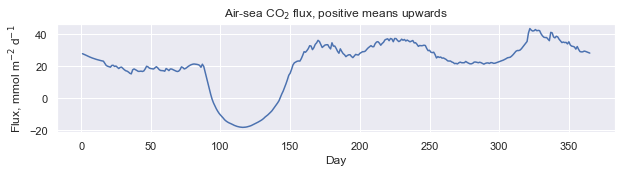

In [4]:
plt.plot(ox, dicflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea CO$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

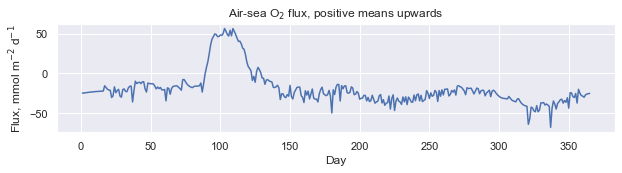

In [5]:
plt.plot(ox, oxyflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea O$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

#### Advective TA exchange

These are data on how alkalinity in the Wadden Sea changes due to mixing with the North Sea. Positive means alkalinity comes from the North Sea, negative - goes to the North Sea.

In [6]:
nh4ta_df = ds['TA_due_to_NH4'].to_dataframe()
no3ta_df = ds['TA_due_to_NO3'].to_dataframe()
po4ta_df = ds['TA_due_to_PO4'].to_dataframe()
so4ta_df = ds['TA_due_to_SO4'].to_dataframe()

In [7]:
year = (('2011-01-01','2011-01-31'), ('2011-02-01','2011-02-28'), ('2011-03-01','2011-03-31'), ('2011-04-01','2011-04-30'), 
        ('2011-05-01','2011-05-31'), ('2011-06-01','2011-06-30'), ('2011-07-01','2011-07-31'), ('2011-08-01','2011-08-31'),
        ('2011-09-01','2011-09-30'), ('2011-10-01','2011-10-31'), ('2011-11-01','2011-11-30'), ('2011-12-01','2011-12-31'))

In [8]:
nh4ta_year = []
no3ta_year = []
po4ta_year = []
so4ta_year = []
for month in year:
    nh4ta_month = nh4ta_df.loc[month[0]:month[1]]
    no3ta_month = no3ta_df.loc[month[0]:month[1]]
    po4ta_month = po4ta_df.loc[month[0]:month[1]]
    so4ta_month = so4ta_df.loc[month[0]:month[1]]
    nh4ta_year.append(nh4ta_month['TA_due_to_NH4'].sum())
    no3ta_year.append(no3ta_month['TA_due_to_NO3'].sum())
    po4ta_year.append(po4ta_month['TA_due_to_PO4'].sum())
    so4ta_year.append(so4ta_month['TA_due_to_SO4'].sum())

In [9]:
nh4ta = np.array(nh4ta_year)
no3ta = np.array(no3ta_year)
po4ta = np.array(po4ta_year)
so4ta = np.array(so4ta_year)
total = nh4ta+no3ta+po4ta+so4ta

here and further, units: mmol m$^{-2}$

In [10]:
nh4ta

array([ -57.724472,  -34.445347,  -28.580479,  -20.3435  ,  -58.750626,
        -46.986984,  -10.831028,  -11.092403,  -17.808699,  -40.038433,
       -134.03366 , -111.75628 ], dtype=float32)

In [11]:
no3ta

array([ -37.92114  ,  -30.888847 ,  -46.29358  , -207.19183  ,
        -95.33879  ,  -43.96344  ,  -39.63102  ,   -2.0348601,
         -4.0063643,   -5.9150224,  -52.22854  ,  -52.83625  ],
      dtype=float32)

In [12]:
po4ta

array([  2.1312208 ,   1.7261665 ,   0.18515338, -11.876101  ,
        -3.0395825 ,  -1.5026454 ,  -2.4156194 ,   0.24018678,
         0.84317803,   2.4042192 ,   6.0775366 ,   5.3426166 ],
      dtype=float32)

In [13]:
so4ta

array([ 59.228233 ,  45.42288  ,  39.374523 ,  18.765333 , -17.390285 ,
       -27.899496 , -39.025265 , -51.667156 , -41.036697 , -30.321947 ,
        -3.5132053,  36.002663 ], dtype=float32)

In [14]:
total

array([ -34.286163,  -18.185154,  -35.31438 , -220.6461  , -174.51929 ,
       -120.35257 ,  -91.90293 ,  -64.55423 ,  -62.008583,  -73.871185,
       -183.69788 , -123.247246], dtype=float32)

In [15]:
sum(so4ta)

-12.060421705245972

In [16]:
sum(total)

-1202.585708618164